In [1]:
import os
import re
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import median_absolute_error

from sklearn.model_selection import GridSearchCV

import pickle

%matplotlib inline

In [2]:
os.listdir()

['app.py',
 'Dockerfile',
 'Fractal-Hiring.ipynb',
 'model.pkl',
 'requirements.txt',
 'submission-mehul.csv',
 'test.csv',
 'train.csv']

In [3]:
df = pd.read_csv("train.csv", index_col = "Index")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
Index,,,,,,,,,,
0,<p>😅The pH value observed is: 0.2644088544860...,<br>😒With a hardness level of 2.6735383052025...,<br>😅The water sample exhibits a total solids ...,1.431972,1.303685,1.563001,0.697062,2.010126,<h1>😀Observing a turbidity value of 1.60887258...,1.252351
1,<p>😇The solution's pH level is 0.012034498894...,<h1>😀The water hardness is measured at 2.6303...,<br>😒The total solids content in the sample is...,0.911372,1.181754,1.741640,0.896108,1.807786,<br>😁The water sample exhibits a turbidity rea...,1.124565
2,<br>😀The pH reading measures 0.491167423175516...,<h2>😅With a hardness level of 1.2213782428674...,<h1>😍The water sample exhibits a total solids ...,1.506492,1.700871,2.322337,1.035440,1.548768,<p>😇Observing a turbidity value of 1.008907465...,0.525886
3,<h1>😅The water sample's pH level is 0.4865531...,<h2>😀With a hardness level of 1.2591335755542...,<h1>😅The total solids content in the sample is...,2.658852,3.035266,2.409255,1.185713,1.232375,<p>😇The water sample exhibits a turbidity read...,0.715288
4,<p>😍The observed pH value of 0.07548804288855...,<p>😁With a hardness level of 1.65681755735377...,<p>😍The total solids content in the sample is ...,2.169616,1.520531,1.990604,1.237182,1.589307,<h1>😒The water sample exhibits a turbidity rea...,0.890722


In [4]:
# Extracting values

df["values_ph"] = df["ph"].str.findall(r'\d+\.\d+').transform(''.join)
df["values_hardness"] = df["Hardness"].str.findall(r'\d+\.\d+').transform(''.join)
df["values_solids"] = df["Solids"].str.findall(r'\d+\.\d+').transform(''.join)
df["values_turbidity"] = df["Turbidity"].str.findall(r'\d+\.\d+').transform(''.join)


# dropping columns

df.drop(["ph", "Hardness", "Solids", "Turbidity"], axis = 1, inplace = True)

df.head(2)

,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Potability,values_ph,values_hardness,values_solids,values_turbidity
Index,,,,,,,,,,
0,1.431972,1.303685,1.563001,0.697062,2.010126,1.252351,0.2644088544860405,2.6735383052025394,2.3367434736028416,1.608872586633192
1,0.911372,1.181754,1.741640,0.896108,1.807786,1.124565,0.012034498894414648,2.6303227767376702,2.4958525199015145,1.4784302501598692


In [5]:
# checking duplicated or null

print("Duplicated : {}".format(df.duplicated().sum()))
print("isNa values : {}".format(df.isna().sum()))

Duplicated : 0
isNa values : Chloramines         0
Sulfate             0
Conductivity        0
Organic_carbon      0
Trihalomethanes     0
Potability          0
values_ph           0
values_hardness     0
values_solids       0
values_turbidity    0
dtype: int64


        Chloramines       Sulfate  Conductivity  Organic_carbon  \
count  10000.000000  10000.000000  10000.000000    10000.000000   
mean       1.577655      1.846947      2.106003        1.253408   
std        0.455594      0.534522      0.605440        0.360951   
min        0.771551      0.852042      0.960479        0.554247   
25%        1.195690      1.404213      1.608786        0.953677   
50%        1.516832      1.774148      2.024260        1.204477   
75%        1.919671      2.238055      2.537743        1.512738   
max        2.974793      3.649794      4.153664        2.507518   

       Trihalomethanes    Potability  
count     10000.000000  10000.000000  
mean          1.774500      0.964083  
std           0.516305      0.280262  
min           0.782468      0.367202  
25%           1.358345      0.756679  
50%           1.700410      0.924841  
75%           2.132153      1.132913  
max           3.795695      2.219079  


array([[<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>],
       [<Axes: title={'center': 'Conductivity'}>,
        <Axes: title={'center': 'Organic_carbon'}>],
       [<Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Potability'}>]], dtype=object)

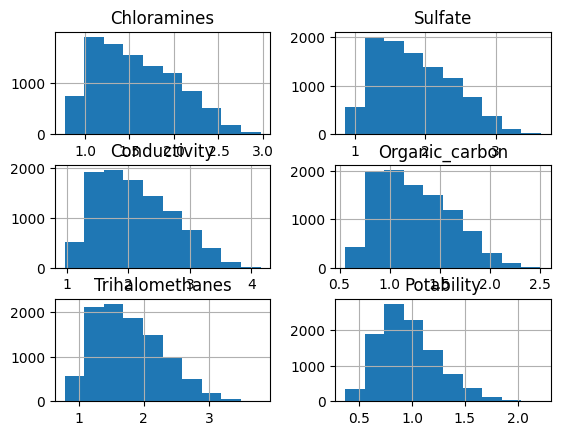

In [6]:
# describe data

print(df.describe())
df.hist()

we see all distribution of data is left skewed. we need to correct this.

In [7]:
# converting to float

df['values_ph'] = df['values_ph'].astype(float)
df['values_hardness'] = df['values_hardness'].astype(float)
df['values_solids'] = df['values_solids'].astype(float)
df['values_turbidity'] = df['values_turbidity'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Chloramines       10000 non-null  float64
 1   Sulfate           10000 non-null  float64
 2   Conductivity      10000 non-null  float64
 3   Organic_carbon    10000 non-null  float64
 4   Trihalomethanes   10000 non-null  float64
 5   Potability        10000 non-null  float64
 6   values_ph         10000 non-null  float64
 7   values_hardness   10000 non-null  float64
 8   values_solids     10000 non-null  float64
 9   values_turbidity  10000 non-null  float64
dtypes: float64(10)
memory usage: 859.4 KB


Splitting into train-test

In [8]:
# train test split & seed = 42

X = df.drop('Potability', axis=1)  # Features
y = df['Potability']            # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
# Standardize or z-scale
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

use error function:

score = max(0, 100*(1-metrics.median_absolute_error(actual, predicted)))

In [10]:
# Initialize the model
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = max(0, 100*(1-median_absolute_error(y_test, y_pred)))

print("Linear Regression - Evaluated score for the model : {}" .format(score))

Linear Regression - Evaluated score for the model : 85.76084464083348


In [11]:
# Initialize the model with an appropriate learning rate
model = SGDRegressor(learning_rate='constant', eta0=0.1)

# Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

score = max(0, 100*(1-median_absolute_error(y_test, y_pred)))
print("SGDRegressor - Evaluated score for the model : {}" .format(score))

SGDRegressor - Evaluated score for the model : 81.55840448292544


In [12]:
# score function

def score_custom(a, b):
    return max(0, 100*(1-median_absolute_error(a, b)))
    

In [13]:
# Define the model
model = SGDRegressor()

# Define a parameter grid for hyperparameter tuning
param_grid = {'alpha': [1e-5, 1e-3, 1e-1], 'penalty': ['l1', 'l2'], 'learning_rate': ['constant', 'optimal', 'adaptive']}


# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)



In [14]:
# Fit the grid search model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print('Best Parameters: {grid_search.best_params_}')
print('Best Score: {grid_search.best_score_}')

# Evaluate the best model on the test set

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
final_score = score_custom(y_test, y_pred)
print(f'Final score: {final_score}')

y_pred = best_model.predict(X_test)


Best Parameters: {grid_search.best_params_}
Best Score: {grid_search.best_score_}
Final score: 85.73905654876671


In [15]:
del df

### Test Data

In [16]:
df_test = pd.read_csv("test.csv", index_col = "Index")
df_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Index,,,,,,,,,
10000,<br>😒The observed pH value of 0.4583260930518...,<h1>😁The observed water hardness of 1.7903445...,<p>😁Observing a solids concentration of 1.573...,1.540880,1.659576,2.156778,1.665096,2.105437,<br>😅The turbidity of the water is measured at...
10001,<br>😀The pH value observed is: 0.006163832801...,<p>😁The observed water hardness of 2.37971669...,<h1>😒The total solids content in the sample is...,1.225821,1.320635,2.251759,1.333259,1.480757,<p>😅The water sample exhibits a turbidity read...
10002,<h2>😀The pH reading measures 0.682188913921691...,<h2>😇The observed water hardness of 1.4080275...,<p>😍The total solids content in the sample is ...,2.430112,1.178618,1.614353,0.890702,1.824291,<br>😀Observing a turbidity value of 1.11871445...
10003,<p>😀The observed pH value of 0.56282397372454...,<br>😀The observed water hardness of 1.8369703...,<h1>😍The total solids content in the sample is...,1.910825,2.731592,1.626107,0.711949,2.598104,<br>😍The turbidity of the water is measured at...
10004,<h1>😇The pH reading measures 0.336142283595807...,<h1>😀The water hardness is measured at 1.5104...,<br>😀Observing a solids concentration of 2.33...,1.940168,1.269851,1.832447,0.947763,1.052021,<h1>😁The water sample exhibits a turbidity rea...


In [17]:
# Extracting values

df_test["values_ph"] = df_test["ph"].str.findall(r'\d+\.\d+').transform(''.join)
df_test["values_hardness"] = df_test["Hardness"].str.findall(r'\d+\.\d+').transform(''.join)
df_test["values_solids"] = df_test["Solids"].str.findall(r'\d+\.\d+').transform(''.join)
df_test["values_turbidity"] = df_test["Turbidity"].str.findall(r'\d+\.\d+').transform(''.join)

# converting to float

df_test['values_ph'] = df_test['values_ph'].astype(float)
df_test['values_hardness'] = df_test['values_hardness'].astype(float)
df_test['values_solids'] = df_test['values_solids'].astype(float)
df_test['values_turbidity'] = df_test['values_turbidity'].astype(float)

# dropping columns
df_test.drop(["ph", "Hardness", "Solids", "Turbidity"], axis = 1, inplace = True)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 10000 to 14999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Chloramines       5000 non-null   float64
 1   Sulfate           5000 non-null   float64
 2   Conductivity      5000 non-null   float64
 3   Organic_carbon    5000 non-null   float64
 4   Trihalomethanes   5000 non-null   float64
 5   values_ph         5000 non-null   float64
 6   values_hardness   5000 non-null   float64
 7   values_solids     5000 non-null   float64
 8   values_turbidity  5000 non-null   float64
dtypes: float64(9)
memory usage: 390.6 KB


In [18]:
# Standardize or z-scale
# scaler = StandardScaler()

final_X_test = scaler.transform(df_test)
scaler_mean = scaler.mean_
print(scaler_mean)

[1.57948132 1.8475778  2.1079807  1.25334713 1.77475237 0.41834317
 1.79359513 1.88550002 1.23699266]


In [19]:
final_X_test

array([[-0.08492592, -0.3525887 ,  0.08071821, ..., -0.00628741,
        -0.57751528, -0.7140946 ],
       [-0.77808921, -0.98825589,  0.2378317 , ...,  1.13369167,
        -0.93478386,  0.7406281 ],
       [ 1.87147619, -1.25460282, -0.8165346 , ..., -0.74577484,
         0.27911743, -0.32988285],
       ...,
       [ 0.83188674,  1.03986962, -0.62431238, ...,  0.10470668,
         1.41877893, -0.21133889],
       [-0.70232189, -0.68582353,  1.08327755, ..., -0.74552388,
        -0.59692506,  0.29533799],
       [-0.77629651, -0.07015378, -0.57116885, ..., -1.00334599,
         1.61037202, -1.05690075]])

In [20]:
y_pred_test = best_model.predict(final_X_test)

In [21]:
y_pred_test

array([1.03850012, 1.08677141, 1.06467474, ..., 1.33855324, 0.86475394,
       0.97053605])

In [22]:
df_test["Potability"] = y_pred_test

In [23]:
df_test.head()

,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,values_ph,values_hardness,values_solids,values_turbidity,Potability
Index,,,,,,,,,,
10000,1.540880,1.659576,2.156778,1.665096,2.105437,0.458326,1.790345,1.573929,0.980957,1.038500
10001,1.225821,1.320635,2.251759,1.333259,1.480757,0.006164,2.379717,1.381182,1.502542,1.086771
10002,2.430112,1.178618,1.614353,0.890702,1.824291,0.682189,1.408028,2.036084,1.118714,1.064675
10003,1.910825,2.731592,1.626107,0.711949,2.598104,0.562824,1.836970,2.525041,1.674618,0.821292
10004,1.940168,1.269851,1.832447,0.947763,1.052021,0.336142,1.510495,2.338528,1.046728,1.230239


In [24]:
df_test["Potability"].to_csv("submission-mehul.csv", index = True)

In [25]:
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print("Model trained and saved as model.pkl")

Model trained and saved as model.pkl


In [26]:
def predict(input_list_data):
    # Load the saved model
    with open('model.pkl', 'rb') as f:
        model = pickle.load(f)
    
    # Test data (sample input for prediction)
    test_data = input_list_data
    prediction = model.predict([test_data])
    
    print(f"Prediction for {test_data}: {prediction}")

In [27]:
if __name__ == '__main__':
    # train_model()
    predict(input_list_data=[-0.08492, -0.3525887 ,  0.08071821,  1.1405515 ,  0.63897538,
        0.13168923, -0.00628741, -0.57751528, -0.7140946 ])

Prediction for [-0.08492, -0.3525887, 0.08071821, 1.1405515, 0.63897538, 0.13168923, -0.00628741, -0.57751528, -0.7140946]: [1.03850071]


In [28]:
print(sklearn.__version__)

1.5.2
